<div style="background-color: #f0f8ff; padding: 20px; border: 2px solid #3498db; border-radius: 10px; margin-bottom: 20px; font-size: 16px; color: #2c3e50;">
    <h1 style="color: #2980b9; font-size: 56px; margin-bottom: 10px;">💡 Pandas Tips and Tricks</h1>
    <h3 style="color: #2980b9;">Author: Muhammad Kamran Syed</h3>
</div>

In [1]:
#Importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
# How to find pandas installed version

print(pd.__version__)

# or show with all dependencies
#pd.show_versions()

2.2.3


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">01. Creating Pandas DataFrames & Series</h1>

# 01. Creating Pandas DataFrames & Series

In [3]:
# Create DataFrame Using Dictionary

data = {
    'student id': [1, 2, 3, 4, 5],
    'student name': ['Mark', 'David', 'Tim', 'Robert', 'Henry' ],
    'program name': ['BSCS', 'MSML', 'MSDS', 'MSCS', 'MBA']
}

df_exercise = pd.DataFrame(data)
df_exercise

,student id,student name,program name
0,1,Mark,BSCS
1,2,David,MSML
2,3,Tim,MSDS
3,4,Robert,MSCS
4,5,Henry,MBA


In [4]:
# Create Pandas Series
series1 = pd.Series([1, 2, 3, 4, 5])
series2 = pd.Series(['AZ', 'BY', 'CX', 'DW', 'EV'])

# Create Dataframe from series
df_exercise = pd.DataFrame({'A': series1, 'B': series2})
df_exercise

,A,B
0,1,AZ
1,2,BY
2,3,CX
3,4,DW
4,5,EV


In [5]:
# Create DataFrom using a numpy 2D array
data = np.array([[1, 2, 3], [4, 5, 6]])
df_exercise = pd.DataFrame(data)
df_exercise


,0,1,2
0,1,2,3
1,4,5,6


In [6]:
# Create using numpy random number generation method 
# randint(low, hight, size=(rows, cols))
data = np.random.randint(1, 5000, size=(500, 10))
df_exercise = pd.DataFrame(data, columns=list("ABCDEFGHIJ"))
df_exercise

,A,B,C,D,E,F,G,H,I,J
0,124,4361,4807,378,1590,1275,4554,2839,2973,475
1,842,1427,1202,5,1139,677,976,3896,3852,4574
2,3154,645,4943,3167,3380,180,2028,3461,1025,1926
3,2577,2029,4042,3761,2426,179,511,2910,2554,3344
4,1354,4859,3316,4247,1594,3733,2992,3918,3277,1382
...,...,...,...,...,...,...,...,...,...,...
495,2401,3949,2917,3372,120,128,4457,1935,1615,1859
496,1987,1713,1826,572,1604,2623,4081,3219,4046,1214
497,1316,1444,4366,4808,4967,2578,842,1777,2030,3903
498,1202,1041,2892,3429,2747,4715,1120,1626,2893,48


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">02. Rename a Column</h1>

# 02. Rename a Column

In [7]:
df_exercise = pd.DataFrame({
    'column A': [1, 2, 3, 4, 5],
    'column B': [6, 7, 8, 9, 10],
    'column C': [11, 12, 13, 14, 15],
})
df_exercise

,column A,column B,column C
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [8]:
# provide a map in Old_Name : New_Name format to df.rename method
df_exercise.rename(columns={'column A': 'col A', 'column B': 'col b'}, inplace=True)
df_exercise

,col A,col b,column C
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [9]:
# Just assign to the column array with the updated name in the same order
df_exercise.columns = ['col_a', 'col_b', 'col name c']
df_exercise

,col_a,col_b,col name c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [10]:
# Replace a character in the column names
df_exercise.columns = df_exercise.columns.str.replace(' name ', '_')
df_exercise

,col_a,col_b,col_c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [11]:
# Add a prefix and suffix to column names
df_exercise = df_exercise.add_prefix('column_name_')
df_exercise = df_exercise.add_suffix('_end')

df_exercise

,column_name_col_a_end,column_name_col_b_end,column_name_col_c_end
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [12]:
# Revert back suffix and prefix addition
# The first replace will return a columns array on which another replace will be executed
df_exercise.columns = df_exercise.columns.str.replace('column_name_', '').str.replace('_end', '')
df_exercise

,col_a,col_b,col_c
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">03. Using Template Data from Seaborn</h1>

# 03. Using Template Data from Seaborn

In [13]:
# Print the top 10 Dataset names in Seaborn
pprint(sns.get_dataset_names()[:10])

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights']


In [14]:
df_flights = sns.load_dataset('flights')
df_flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [15]:
df_dnd = sns.load_dataset('diamonds')
df_dnd.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [16]:
df_exercise = sns.load_dataset('exercise')
df_exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [17]:
print('Columns =', df_exercise.columns)

print('Shape =', df_exercise.shape)

df_exercise.info()

Columns = Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')
Shape = (90, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [18]:
# Describe the DataFrame and change the orientation to Landscape (Transpose)
print('Descriptive Stats:\n', df_exercise.describe(include='all').transpose())

Descriptive Stats:
            count unique     top freq  mean        std   min    25%   50%  \
Unnamed: 0  90.0    NaN     NaN  NaN  44.5  26.124701   0.0  22.25  44.5   
id          90.0    NaN     NaN  NaN  15.5   8.703932   1.0    8.0  15.5   
diet          90      2  no fat   45   NaN        NaN   NaN    NaN   NaN   
pulse       90.0    NaN     NaN  NaN  99.7  14.858471  80.0  90.25  96.0   
time          90      3   1 min   30   NaN        NaN   NaN    NaN   NaN   
kind          90      3    rest   30   NaN        NaN   NaN    NaN   NaN   

              75%    max  
Unnamed: 0  66.75   89.0  
id           23.0   30.0  
diet          NaN    NaN  
pulse       103.0  150.0  
time          NaN    NaN  
kind          NaN    NaN  


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">04. Saving and Loading Data from files</h1>

# 04. Saving and Loading Data from files

In [19]:
# Saving a DataFrame to file
path = ""
df_exercise.to_csv(path + 'exercise.csv', index=False)
print('DataFrame saved in a CSV file')

DataFrame saved in a CSV file


In [20]:
# Saving a DataFrom to a Json File representing 1 json record as a 1 row
df_exercise.to_json(path + "exercise.json", orient='records', indent=4, index=False)
print('DataFrame saved in Json file')

DataFrame saved in Json file


In [21]:
df_exercise = pd.read_csv(path + "exercise.csv")
df_exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">05. Slicing and Reverse</h1>

# 05. Slicing and Reverse

💡 Difference Between `loc` and `iloc` Operators

The `loc` and `iloc` operators work in similar ways. However, there are a few key differences:

1. **Label vs. Position:**
   - `loc`: Works with the **row and column labels**.
   - `iloc`: Works with **row and column positions**.

2. **Inclusivity of Start and End:**
   - `loc`: Both the **start and end labels** are **inclusive**.
   - `iloc`: Only the **start position** is inclusive; the end is **exclusive**.

3. **When to Use:**
   - **Use `loc`** when you know the **name** and **labels** of the rows and/or columns.
   - **Use `iloc`** when you are working based on **positions**.

In [22]:
# All columns and all rows but in reverse order
# df.loc[start:stop:step]
# df.loc[::-1] start from the last and move 1 step backward 
df_exercise.loc[::-1]

,Unnamed: 0,id,diet,pulse,time,kind
89,89,30,no fat,150,30 min,running
88,88,30,no fat,111,15 min,running
87,87,30,no fat,99,1 min,running
86,86,29,no fat,130,30 min,running
85,85,29,no fat,135,15 min,running
...,...,...,...,...,...,...
4,4,2,low fat,92,15 min,rest
3,3,2,low fat,90,1 min,rest
2,2,1,low fat,88,30 min,rest
1,1,1,low fat,85,15 min,rest


In [23]:
#df.loc[row_labels, column_labels]
pprint("==========Select a Row and all Columns=========")
pprint(df_exercise.loc[89])
pprint("==========Select Range of Rows and a Column============")
pprint(df_exercise.loc[87:88, 'diet'])
pprint("==========Select Range of Rows and Range of Columns============")
pprint(df_exercise.loc[80:86, 'diet':'pulse'])
pprint("==========Select Multiple Rows and Multiple Columns============")
pprint(df_exercise.loc[[70, 71, 72], ['id','kind','diet']])


'==========Select a Row and all Columns========='
Unnamed: 0         89
id                 30
diet           no fat
pulse             150
time           30 min
kind          running
Name: 89, dtype: object
'==========Select Range of Rows and a Column============'
87    no fat
88    no fat
Name: diet, dtype: object
'==========Select Range of Rows and Range of Columns============'
      diet  pulse
80  no fat    140
81  no fat    103
82  no fat    124
83  no fat    140
84  no fat     94
85  no fat    135
86  no fat    130
'==========Select Multiple Rows and Multiple Columns============'
    id     kind     diet
70  24  running  low fat
71  24  running  low fat
72  25  running  low fat


In [24]:
#All rows in reverse order and kind column
pprint("==========All rows in reverse order and only kind column============")
pprint(df_exercise.loc[::-1, 'kind'])
pprint("==========A slice of rows and all columns in reverse order============")
pprint(df_exercise.loc[3:10, ::-1])


'==========All rows in reverse order and only kind column============'
89    running
88    running
87    running
86    running
85    running
       ...   
4        rest
3        rest
2        rest
1        rest
0        rest
Name: kind, Length: 90, dtype: object
'==========A slice of rows and all columns in reverse order============'
    kind    time  pulse     diet  id  Unnamed: 0
3   rest   1 min     90  low fat   2           3
4   rest  15 min     92  low fat   2           4
5   rest  30 min     93  low fat   2           5
6   rest   1 min     97  low fat   3           6
7   rest  15 min     97  low fat   3           7
8   rest  30 min     94  low fat   3           8
9   rest   1 min     80  low fat   4           9
10  rest  15 min     82  low fat   4          10


💡 Using `iloc` for Slicing in Pandas

The `iloc` function in pandas is a powerful tool for slicing data based on **positions** (index numbers). Here are some common slicing techniques using `iloc`:

1. **Select a Single Row by Index:**

   ```python
    df.iloc[3]  # Selects the 4th row (index 3)
   ```
    

In [25]:
pprint(df_exercise.iloc[::-1].head())

# Reverse column orders
pprint(df_exercise.iloc[::, ::-1].head())

# All rows in reverse order, all column in reverse order
pprint(df_exercise.iloc[::-1, ::-1].head())
# Same as above
pprint(df_exercise.iloc[:0:-1, :0:-1].head())

# A slice of rows in normal order, All columns in reverse order
# Notice that row 10 will be exclusive
pprint(df_exercise.iloc[3:10, ::-1])

    Unnamed: 0  id    diet  pulse    time     kind
89          89  30  no fat    150  30 min  running
88          88  30  no fat    111  15 min  running
87          87  30  no fat     99   1 min  running
86          86  29  no fat    130  30 min  running
85          85  29  no fat    135  15 min  running
   kind    time  pulse     diet  id  Unnamed: 0
0  rest   1 min     85  low fat   1           0
1  rest  15 min     85  low fat   1           1
2  rest  30 min     88  low fat   1           2
3  rest   1 min     90  low fat   2           3
4  rest  15 min     92  low fat   2           4
       kind    time  pulse    diet  id  Unnamed: 0
89  running  30 min    150  no fat  30          89
88  running  15 min    111  no fat  30          88
87  running   1 min     99  no fat  30          87
86  running  30 min    130  no fat  29          86
85  running  15 min    135  no fat  29          85
       kind    time  pulse    diet  id
89  running  30 min    150  no fat  30
88  running  15 min   

In [26]:
# Every 10 row from 0 to last and all the columns in reverse order
df1 = df_exercise.iloc[::10, ::-1]
print(df1)

# reset the index
df1.reset_index(drop=True, inplace=True)
print(df1.head())

       kind    time  pulse     diet  id  Unnamed: 0
0      rest   1 min     85  low fat   1           0
10     rest  15 min     82  low fat   4          10
20     rest  30 min     90   no fat   7          20
30  walking   1 min     86  low fat  11          30
40  walking  15 min     96  low fat  14          40
50  walking  30 min     90   no fat  17          50
60  running   1 min     93  low fat  21          60
70  running  15 min    132  low fat  24          70
80  running  30 min    140   no fat  27          80
      kind    time  pulse     diet  id  Unnamed: 0
0     rest   1 min     85  low fat   1           0
1     rest  15 min     82  low fat   4          10
2     rest  30 min     90   no fat   7          20
3  walking   1 min     86  low fat  11          30
4  walking  15 min     96  low fat  14          40


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">06. Select a columns by data type</h1>

# 06. Select a columns by data type

In [27]:
df_exercise.dtypes

Unnamed: 0     int64
id             int64
diet          object
pulse          int64
time          object
kind          object
dtype: object

In [28]:
# Incluce all the object datatype
df_exercise.select_dtypes(['object']).head()

,diet,time,kind
0,low fat,1 min,rest
1,low fat,15 min,rest
2,low fat,30 min,rest
3,low fat,1 min,rest
4,low fat,15 min,rest


In [29]:
# Include all the object datatypes
df_exercise.select_dtypes(include=['int64']).head()

,Unnamed: 0,id,pulse
0,0,1,85
1,1,1,85
2,2,1,88
3,3,2,90
4,4,2,92


In [30]:
# Exclude the datatypes
df_exercise.select_dtypes(exclude=['int64']).head()

,diet,time,kind
0,low fat,1 min,rest
1,low fat,15 min,rest
2,low fat,30 min,rest
3,low fat,1 min,rest
4,low fat,15 min,rest


In [31]:
#Combining multiple operations
df_exercise.select_dtypes(include=['int64', 'object']).iloc[::-1, ::-1].head()

,kind,time,pulse,diet,id,Unnamed: 0
89,running,30 min,150,no fat,30,89
88,running,15 min,111,no fat,30,88
87,running,1 min,99,no fat,30,87
86,running,30 min,130,no fat,29,86
85,running,15 min,135,no fat,29,85


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">07. Datatype Conversions</h1>

# 07. Datatype Conversions

In [32]:
# Convert diet column from object to Category datatype and return all the unique values
df_exercise['diet'].astype('category').unique()

['low fat', 'no fat']
Categories (2, object): ['low fat', 'no fat']

In [33]:
# Convert kind and category columns to category and id to int32 from int64
df_exercise = df_exercise.astype({'kind': 'category', 'diet': 'category', 'id': 'int32'})
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int32   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     object  
 5   kind        90 non-null     category
dtypes: category(2), int32(1), int64(2), object(1)
memory usage: 3.0+ KB


In [34]:
# First convert id to float so that we can change it back to numeric using pd.to_numeric function
df_exercise = df_exercise.astype({'id': 'float'})
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     float64 
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     object  
 5   kind        90 non-null     category
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 3.4+ KB


In [35]:
# Now demonstrate the pd.to_numeric function
# Since the number is in float we need to downcast it to integer
# It'll be downcasted based on the max value, in this case it'll be int8 (byte) instead of int32 or int64
# It returns a series back so we need to assign it back to id column
df_exercise['id'] = pd.to_numeric(df_exercise['id'], downcast='integer', errors='coerce')
df_exercise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int8    
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     object  
 5   kind        90 non-null     category
dtypes: category(2), int64(2), int8(1), object(1)
memory usage: 2.8+ KB


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">08. Reduce Dataframe Size</h1>

# 08. Reduce Dataframe Size

In [36]:
# Create a large dataset first having 7 int32 cols and 100000 rows
# Memory usage would be around 2.5 to 3Mbs which is manageable.
# But Consider a DataFrame of 5Millions rows and 100 columns with multiple datatypes including objects.
# The memory utilization would be many GBs that you can't fully load it in memory and process the data.
# In such situations you would like to break you dataFrame into multiple
df_large = pd.DataFrame(np.random.randint(1, 25000, size=(100000, 7)))
pprint(df_exercise.shape)
df_large.info()

(90, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       100000 non-null  int32
 1   1       100000 non-null  int32
 2   2       100000 non-null  int32
 3   3       100000 non-null  int32
 4   4       100000 non-null  int32
 5   5       100000 non-null  int32
 6   6       100000 non-null  int32
dtypes: int32(7)
memory usage: 2.7 MB


In [37]:
df1 = df_large.sample(frac=0.25)
df1.shape

(25000, 7)

In [38]:
# When you want to break the DataFrame into 4 equal dataframes we can do it like this:

# Select a percentage of sample from DataFrame to another Dataframe
# Remove the selected DataFrame from the original Dataframe
# Select another DataFrmae sample

dff = df_large.copy()
print('df =', dff.shape)
df1 = dff.sample(frac=0.25, random_state=42)
dff = dff.drop(df1.index)
print('df1 = 25% =', df1.shape)
print('Remaining =', dff.shape)
df2 = dff.sample(frac=0.34, random_state=42)
dff = dff.drop(df2.index)
print('df2 = Next 25% of df =', df2.shape)
print('Remaining =', dff.shape)
df3 = dff.sample(frac=0.50, random_state=42)
dff = dff.drop(df3.index)
print('df3 = Next 25% of df =', df3.shape)
print('Remaining =', dff.shape)
df4 = dff.sample(frac=1, random_state=42)
dff = dff.drop(df4.index)
print('df4 = Next 25% =', df4.shape)
print('Remaining =', dff.shape)

df = (100000, 7)
df1 = 25% = (25000, 7)
Remaining = (75000, 7)
df2 = Next 25% of df = (25500, 7)
Remaining = (49500, 7)
df3 = Next 25% of df = (24750, 7)
Remaining = (24750, 7)
df4 = Next 25% = (24750, 7)
Remaining = (0, 7)


In [39]:
# Another way is to use the number of rows and Divide it by the no of dataframes you want to distribute them into
# Then provide the n = rows_count as the input for df.sample function
rows_count = df_large.shape[0] // 4
dff = df_large.copy()
print('df =', dff.shape)
df1 = dff.sample(n=rows_count)
dff = dff.drop(df1.index)
print('df1 = 25% =', df1.shape)
print('Remaining =', dff.shape)
df2 = dff.sample(n=rows_count)
dff = dff.drop(df2.index)
print('df2 = Next 25% of df =', df2.shape)
print('Remaining =', dff.shape)
df3 = dff.sample(n=rows_count)
dff = dff.drop(df3.index)
print('df3 = Next 25% of df =', df3.shape)
print('Remaining =', dff.shape)
df4 = dff.sample(frac=1)
dff = dff.drop(df4.index)
print('df4 = Next 25% =', df4.shape)
print('Remaining =', dff.shape)

df = (100000, 7)
df1 = 25% = (25000, 7)
Remaining = (75000, 7)
df2 = Next 25% of df = (25000, 7)
Remaining = (50000, 7)
df3 = Next 25% of df = (25000, 7)
Remaining = (25000, 7)
df4 = Next 25% = (25000, 7)
Remaining = (0, 7)


In [40]:
# Joining 2 Dataset together again

print(df3.shape, df4.shape)
df5 = pd.concat([df3, df4], ignore_index=True)
print(df5.shape)
df5.head()

(25000, 7) (25000, 7)
(50000, 7)


,0,1,2,3,4,5,6
0,22205,11555,16222,11343,21581,10662,22234
1,21366,22044,7766,13235,15642,1740,12511
2,8546,12034,14606,640,21939,1212,22292
3,3808,14126,23246,7911,15091,24572,17639
4,10249,23808,24456,12538,5239,2420,15177


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">09. Copy data to and From Clipboard (Not supported by Kaggle)</h1>

# 09. Copy data to and From Clipboard (Not supported by Kaggle)

In [41]:
# First copy some random 1% data to clipboard
# Not supported by Kaggle
# df_exercise.sample(frac=0.05, random_state=42).to_clipboard()

In [42]:
# Now read the data which we copied to clipboard into another dataframe

# Not supported by Kaggle
# df_from_clipboard = pd.read_clipboard()
# df_from_clipboard

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">10. Filtering and Sorting a Dataset</h1>

# 10. Filtering and Sorting a Dataset

In [43]:
# 10. Filtering and Sorting a Dataset

In [44]:
df_exercise.kind.unique()

['rest', 'walking', 'running']
Categories (3, object): ['rest', 'running', 'walking']

In [45]:
# Filter all the running records where pulse under 95
# When using more than 1 condition, parenthesis are mandatory
df_running = df_exercise[(df_exercise.kind == 'running') & (df_exercise.pulse <= 95)]
df_running

,Unnamed: 0,id,diet,pulse,time,kind
60,60,21,low fat,93,1 min,running
69,69,24,low fat,87,1 min,running
72,72,25,low fat,94,1 min,running
75,75,26,no fat,95,1 min,running
84,84,29,no fat,94,1 min,running


In [46]:
# Sort all the values based on first kind than time in descending order
df_exercise.sort_values(by=['kind', 'time'], ascending=False).head()

,Unnamed: 0,id,diet,pulse,time,kind
32,32,11,low fat,84,30 min,walking
35,35,12,low fat,104,30 min,walking
38,38,13,low fat,93,30 min,walking
41,41,14,low fat,100,30 min,walking
44,44,15,low fat,95,30 min,walking


In [47]:
#Get all the records who are running and pulse is under 95. Sort them by Pulse rate from smallest to largest
df_exercise[(df_exercise.kind == 'running') & (df_exercise.pulse <= 95)].sort_values(by='pulse').reset_index(drop=True)

#df_exercise.time.unique()

,Unnamed: 0,id,diet,pulse,time,kind
0,69,24,low fat,87,1 min,running
1,60,21,low fat,93,1 min,running
2,72,25,low fat,94,1 min,running
3,84,29,no fat,94,1 min,running
4,75,26,no fat,95,1 min,running


In [48]:
df_exercise[df_exercise.time.isin(['15 min', '30 min'])].sort_values(by=['diet', 'pulse']).reset_index(drop=True).head(10)

,Unnamed: 0,id,diet,pulse,time,kind
0,10,4,low fat,82,15 min,rest
1,11,4,low fat,83,30 min,rest
2,32,11,low fat,84,30 min,walking
3,1,1,low fat,85,15 min,rest
4,31,11,low fat,86,15 min,walking
5,2,1,low fat,88,30 min,rest
6,14,5,low fat,91,30 min,rest
7,4,2,low fat,92,15 min,rest
8,13,5,low fat,92,15 min,rest
9,37,13,low fat,92,15 min,walking


In [49]:
df_exercise.pulse.value_counts().head(10)

pulse
92     5
97     5
100    5
93     4
94     4
95     4
90     4
98     4
103    4
96     4
Name: count, dtype: int64

In [50]:
# Get the top 3 most repeated values for pulse
df_exercise.pulse.value_counts().nlargest(5).index

Index([92, 97, 100, 93, 94], dtype='int64', name='pulse')

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">11. Splitting a Column</h1>

# 11. Splitting a Column

In [51]:
# 11. Splitting a Column

In [52]:
data = {
    'full_name': [
        'John Michael Doe', 
        'Jane Emily Smith', 
        'Robert James Brown', 
        'Mary Anne Johnson', 
        'William Henry White'
    ],
    'age': [32, 28, 45, 39, 50],
    'sex': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'full_address': [
        '123 Main St, Downtown, Springfield, USA',
        '456 Elm St, Suburbia, Metropolis, USA',
        '789 Oak St, Riverside, Capital City, UK',
        '321 Pine St, Uptown, Riverdale, Canada',
        '654 Maple St, Seaside, Oceanview, Australia'
    ]
}

# Create a pandas DataFrame
df_person = pd.DataFrame(data)

# Display the DataFrame
print(df_person)

             full_name  age     sex  \
0     John Michael Doe   32    Male   
1     Jane Emily Smith   28  Female   
2   Robert James Brown   45    Male   
3    Mary Anne Johnson   39  Female   
4  William Henry White   50    Male   

                                  full_address  
0      123 Main St, Downtown, Springfield, USA  
1        456 Elm St, Suburbia, Metropolis, USA  
2      789 Oak St, Riverside, Capital City, UK  
3       321 Pine St, Uptown, Riverdale, Canada  
4  654 Maple St, Seaside, Oceanview, Australia  


In [53]:
# Expand the DataFrame with new columns populated from an existing column
df_person[["first_name", "middle_name", "last_name"]] = df_person.full_name.str.split(' ', expand=True)
df_person.head()

,full_name,age,sex,full_address,first_name,middle_name,last_name
0,John Michael Doe,32,Male,"123 Main St, Downtown, Springfield, USA",John,Michael,Doe
1,Jane Emily Smith,28,Female,"456 Elm St, Suburbia, Metropolis, USA",Jane,Emily,Smith
2,Robert James Brown,45,Male,"789 Oak St, Riverside, Capital City, UK",Robert,James,Brown
3,Mary Anne Johnson,39,Female,"321 Pine St, Uptown, Riverdale, Canada",Mary,Anne,Johnson
4,William Henry White,50,Male,"654 Maple St, Seaside, Oceanview, Australia",William,Henry,White


In [54]:
# Expand the dataframe with new columns populated from an existing column
df_person[["address_line1", "area", "city", "country"]] = df_person.full_address.str.split(', ', expand=True)
df_person.head()

,full_name,age,sex,full_address,first_name,middle_name,last_name,address_line1,area,city,country
0,John Michael Doe,32,Male,"123 Main St, Downtown, Springfield, USA",John,Michael,Doe,123 Main St,Downtown,Springfield,USA
1,Jane Emily Smith,28,Female,"456 Elm St, Suburbia, Metropolis, USA",Jane,Emily,Smith,456 Elm St,Suburbia,Metropolis,USA
2,Robert James Brown,45,Male,"789 Oak St, Riverside, Capital City, UK",Robert,James,Brown,789 Oak St,Riverside,Capital City,UK
3,Mary Anne Johnson,39,Female,"321 Pine St, Uptown, Riverdale, Canada",Mary,Anne,Johnson,321 Pine St,Uptown,Riverdale,Canada
4,William Henry White,50,Male,"654 Maple St, Seaside, Oceanview, Australia",William,Henry,White,654 Maple St,Seaside,Oceanview,Australia


In [55]:
# Adds a new column by combining 2 columns
df_person['alias'] = df_person.first_name.str[0:3] + df_person.middle_name.str[0:3] + df_person.last_name.str[0:3]
df_person.alias

0    JohMicDoe
1    JanEmiSmi
2    RobJamBro
3    MarAnnJoh
4    WilHenWhi
Name: alias, dtype: object

In [56]:
# Rearrange the columns
df_person = df_person[["first_name", "middle_name", "last_name", "alias", "full_name", "age", "sex", "address_line1", "area", "city", "country", "full_address"]]
df_person

,first_name,middle_name,last_name,alias,full_name,age,sex,address_line1,area,city,country,full_address
0,John,Michael,Doe,JohMicDoe,John Michael Doe,32,Male,123 Main St,Downtown,Springfield,USA,"123 Main St, Downtown, Springfield, USA"
1,Jane,Emily,Smith,JanEmiSmi,Jane Emily Smith,28,Female,456 Elm St,Suburbia,Metropolis,USA,"456 Elm St, Suburbia, Metropolis, USA"
2,Robert,James,Brown,RobJamBro,Robert James Brown,45,Male,789 Oak St,Riverside,Capital City,UK,"789 Oak St, Riverside, Capital City, UK"
3,Mary,Anne,Johnson,MarAnnJoh,Mary Anne Johnson,39,Female,321 Pine St,Uptown,Riverdale,Canada,"321 Pine St, Uptown, Riverdale, Canada"
4,William,Henry,White,WilHenWhi,William Henry White,50,Male,654 Maple St,Seaside,Oceanview,Australia,"654 Maple St, Seaside, Oceanview, Australia"


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">12. Aggregations by grouping</h1>

# 12. Aggregations by grouping

In [57]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [58]:
# Groupby the values in who column
# Groupby is effective with categorical data 
# and not too effective with discrete numerica or continous data
who = df_titanic.groupby('who')
print(who, "\n", who.count(), "\n", len(who))

        survived  pclass  sex  age  sibsp  parch  fare  embarked  class  \
who                                                                      
child        83      83   83   83     83     83    83        83     83   
man         537     537  537  413    537    537   537       537    537   
woman       271     271  271  218    271    271   271       269    271   

       adult_male  deck  embark_town  alive  alone  
who                                                 
child          83    13           83     83     83  
man           537    99          537    537    537  
woman         271    91          269    271    271   
 3


### Grouped by multiple columns
first on sex than on survived and than on deck and apply count function on each column

In [59]:
group = df_titanic.groupby(["sex", "survived", "deck"]).count()
print("\n", group.head())
group.to_excel(path+'groupby.xlsx')


                       pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived deck                                                          
female 0        A          0    0      0      0     0         0      0    0   
                B          0    0      0      0     0         0      0    0   
                C          3    3      3      3     3         3      3    3   
                D          0    0      0      0     0         0      0    0   
                E          1    1      1      1     1         1      1    1   

                      adult_male  embark_town  alive  alone  
sex    survived deck                                         
female 0        A              0            0      0      0  
                B              0            0      0      0  
                C              3            3      3      3  
                D              0            0      0      0  
                E              1            1      1      1  


C:\Users\smkamran\AppData\Local\Temp\ipykernel_9768\2340556849.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group = df_titanic.groupby(["sex", "survived", "deck"]).count()


In [60]:
# In case of group it's a multi index
group.index[0:4]

MultiIndex([('female', 0, 'A'),
            ('female', 0, 'B'),
            ('female', 0, 'C'),
            ('female', 0, 'D')],
           names=['sex', 'survived', 'deck'])

0.3838383838383838

 sex
female    233
male      109
Name: survived, dtype: int64


C:\Users\smkamran\AppData\Local\Temp\ipykernel_9768\2712838157.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_titanic.groupby(['sex', 'class']).survived.sum()


<Axes: ylabel='survived'>

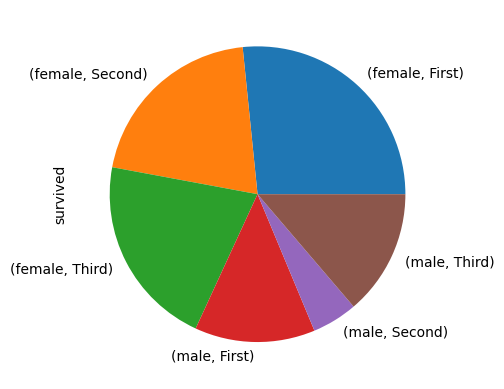

In [61]:
# Simple mean of a column
print(df_titanic.survived.mean())

# Groupby sex and then compute mean of survived column
print("\n", df_titanic.groupby('sex').survived.sum())

# Groupby sex and class and then compute mean of survived column
grouped = df_titanic.groupby(['sex', 'class']).survived.sum()
grouped.plot(kind='pie')

### Applying multiple aggregations (Applying on more than 1 columns)

In [62]:
# Groupby and unstack is used to change the layout of data and make data easier to read
grouped.unstack()

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


### Applying multiple aggregating functions on different columns

The agg() function in pandas is a powerful tool used to apply multiple aggregation functions on different columns after grouping the data. It allows you to summarize data in a flexible way, applying different aggregation functions to different columns at the same time.

In [63]:
grouped_titanic = df_titanic.groupby('pclass').agg({
    'age': ['mean', 'min', 'max'],     # Aggregating 'age' column (mean, min, max)
    'fare': ['sum', 'mean'],           # Aggregating 'fare' column (sum, mean)
    'survived': 'mean'                 # Aggregating 'survived' column (mean, representing survival rate)
}).reset_index()

grouped_titanic

pclass        age                    fare             survived
               mean   min   max         sum       mean      mean
0      1  38.233441  0.92  80.0  18177.4125  84.154687  0.629630
1      2  29.877630  0.67  70.0   3801.8417  20.662183  0.472826
2      3  25.140620  0.42  74.0   6714.6951  13.675550  0.242363

In [64]:
grouped_titanic.unstack()

pclass          0        1.000000
                1        2.000000
                2        3.000000
age       mean  0       38.233441
                1       29.877630
                2       25.140620
          min   0        0.920000
                1        0.670000
                2        0.420000
          max   0       80.000000
                1       70.000000
                2       74.000000
fare      sum   0    18177.412500
                1     3801.841700
                2     6714.695100
          mean  0       84.154687
                1       20.662183
                2       13.675550
survived  mean  0        0.629630
                1        0.472826
                2        0.242363
dtype: float64

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">13. Reading the data back from the excel file keeping the grouped info intact.</h1>

# 13. Reading the data back from the excel file keeping the grouped info intact.

In [65]:
# Reading the data back from the excel file keeping the grouped info intact.

df_grouped = pd.read_excel(path+'groupby.xlsx', index_col=[0, 1, 2])
df_grouped.head(10)

pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived deck                                                          
female 0        A          0    0      0      0     0         0      0    0   
                B          0    0      0      0     0         0      0    0   
                C          3    3      3      3     3         3      3    3   
                D          0    0      0      0     0         0      0    0   
                E          1    1      1      1     1         1      1    1   
                F          0    0      0      0     0         0      0    0   
                G          2    2      2      2     2         2      2    2   
       1        A          1    1      1      1     1         1      1    1   
                B         27   26     27     27    27        25     27   27   
                C         24   22     24     24    24        24     24   24   

                      adult_male  embark_town  alive  alone  
sex    survived deck                                         
female 0        A              0            0      0      0  
                B              0            0      0      0  
                C              3            3      3      3  
                D              0            0      0      0  
                E              1            1      1      1  
                F              0            0      0      0  
                G              2            2      2      2  
       1        A              1            1      1      1  
                B             27           25     27     27  
                C             24           24     24     24

💡 Reading Excel File as Plain Data and Setting Indexes Manually

Instead of relying on automatic index detection when reading Excel files, you can:
1. **Read the Excel file as plain data** (without specifying an index).
2. **Manually set the index** to the desired columns after loading the data.

### **Example:**

```python
import pandas as pd

## Step 1: Read the Excel file without setting the index
df = pd.read_excel('your_file.xlsx')

## Step 2: Manually set the index to specific columns
df.set_index(['column_name_1', 'column_name_2'], inplace=True)

## Step 3: If required forward fill the missing data for groups

## Display the DataFrame
print(df)
```


In [66]:
# Read the Excel file
df_grouped = pd.read_excel(path+'groupby.xlsx')

# Forward fill the 'sex', 'survived', and 'deck' columns to fill NaN values
df_grouped[['sex', 'survived', 'deck']] = df_grouped[['sex', 'survived', 'deck']].fillna(method='ffill')

df_grouped['survived'] = df_grouped.survived.astype('int32', errors='ignore')

# Set the index back to 'sex', 'survived', and 'deck'
df_grouped.set_index(['sex', 'survived', 'deck'], inplace=True)

# Display the DataFrame
df_grouped.head(10)

C:\Users\smkamran\AppData\Local\Temp\ipykernel_9768\1546128937.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_grouped[['sex', 'survived', 'deck']] = df_grouped[['sex', 'survived', 'deck']].fillna(method='ffill')


pclass  age  sibsp  parch  fare  embarked  class  who  \
sex    survived deck                                                          
female 0        A          0    0      0      0     0         0      0    0   
                B          0    0      0      0     0         0      0    0   
                C          3    3      3      3     3         3      3    3   
                D          0    0      0      0     0         0      0    0   
                E          1    1      1      1     1         1      1    1   
                F          0    0      0      0     0         0      0    0   
                G          2    2      2      2     2         2      2    2   
       1        A          1    1      1      1     1         1      1    1   
                B         27   26     27     27    27        25     27   27   
                C         24   22     24     24    24        24     24   24   

                      adult_male  embark_town  alive  alone  
sex    survived deck                                         
female 0        A              0            0      0      0  
                B              0            0      0      0  
                C              3            3      3      3  
                D              0            0      0      0  
                E              1            1      1      1  
                F              0            0      0      0  
                G              2            2      2      2  
       1        A              1            1      1      1  
                B             27           25     27     27  
                C             24           24     24     24

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">14. Continous Data to Categorical Data</h1>

# 14. Continous Data to Categorical Data

In [67]:
df_titanic['age_group'] = pd.cut(df_titanic.age, 
                                 bins=[0, 3, 12, 17, 35, 50, 100], # Age bins 
                                 labels=['Infant', 'Child', 'Teen', 'Young Adult', 'Adult', 'Senior'], # Labels for bins
                                 right=False)

# Display the Datafrme age and newly added age_group column sort by age and Transpose the results
df_titanic[['age', 'age_group']].head(10)

,age,age_group
0,22.0,Young Adult
1,38.0,Adult
2,26.0,Young Adult
3,35.0,Adult
4,35.0,Adult
5,NaN,NaN
6,54.0,Senior
7,2.0,Infant
8,27.0,Young Adult
9,14.0,Teen


In [68]:
# Count of survived group by age_group, shown as transposed
df_titanic.groupby('age_group').survived.count().T

C:\Users\smkamran\AppData\Local\Temp\ipykernel_9768\2582380810.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby('age_group').survived.count().T


age_group
Infant          24
Child           44
Teen            32
Young Adult    379
Adult          161
Senior          74
Name: survived, dtype: int64

In [69]:
# Groupby age_group and survived and then count the non null values for each and disply the count for age only.
# This will display the total count of survival and not survival for each group
# We can see the most people not survived are from Young Adult group, than adult and then Seniors
df_titanic.groupby(['age_group', 'survived']).count()['age']

C:\Users\smkamran\AppData\Local\Temp\ipykernel_9768\3755407140.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby(['age_group', 'survived']).count()['age']


age_group    survived
Infant       0             9
             1            15
Child        0            20
             1            24
Teen         0            16
             1            16
Young Adult  0           238
             1           141
Adult        0            94
             1            67
Senior       0            47
             1            27
Name: age, dtype: int64

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">15. Categorical Data to Discrete Data using map function</h1>

# 15. Categorical Data to Discrete Data using map function

In [70]:
df_titanic['sex_number'] = df_titanic.sex.map({'male': 0, "female": 1})
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,sex_number
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Young Adult,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Young Adult,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Young Adult,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Young Adult,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Young Adult,0


In [71]:
df_titanic.embarked.value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [72]:
# Starting from 0, automatically map the values based on occourances count
df_titanic['embarked_number'] = df_titanic.embarked.factorize()[0]
df_titanic.embarked_number.value_counts()

embarked_number
 0    644
 1    168
 2     77
-1      2
Name: count, dtype: int64

<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">16. Reshaping a DataFrame (melt/pivot/explode functions)</h1>


# 16. Reshaping a DataFrame (melt/pivot/explode functions)

💡 Pandas `melt()` Function

The `melt()` function in pandas is used to **unpivot** a DataFrame from **wide format** to **long format**.

- **Wide Format**: Each variable is a separate column.
- **Long Format**: Each variable is represented in one column, and the values are stored in a corresponding column.

This is especially useful when you need to restructure data for easier analysis or visualization.


In [73]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Fare': [100, 200, 300],
    'Survived': [1, 0, 1]
}

df_passenger = pd.DataFrame(data)
df_passenger # Original dataframe

,Name,Age,Fare,Survived
0,Alice,25,100,1
1,Bob,30,200,0
2,Charlie,35,300,1


💡 Using `melt()` to Reshape the DataFrame from Wide to Long Format

We can use the `melt()` function in pandas to **unpivot** columns, transforming a DataFrame from **wide format** to **long format**. In this example, we will unpivot the `Age` and `Fare` columns, creating new rows for each combination of `Name` and `Survived`.

### **Example:**

```python
import pandas as pd

## Sample DataFrame
data = {
    'Name': ['John', 'Jane'],
    'Survived': [1, 0],
    'Age': [22, 35],
    'Fare': [7.25, 71.83]
}

df = pd.DataFrame(data)

## Use melt to reshape the DataFrame
df_melted = pd.melt(df, id_vars=['Name', 'Survived'], value_vars=['Age', 'Fare'], 
                    var_name='Variable', value_name='Value')

## Display the reshaped DataFrame
print(df_melted)                                                                  
```

In [74]:
df_melted = pd.melt(df_passenger,
                    id_vars=['Name', 'Survived'], # Keep 'Name' and 'Survived' as identifiers
                    value_vars=['Age', 'Fare'], # Unpivot 'Age' and 'Fare' as rows
                    var_name='Features', # New column name for unpivoted variables (Age and Fare)
                    value_name='Value' # New column name for unpivoted variable values
)

df_melted

,Name,Survived,Features,Value
0,Alice,1,Age,25
1,Bob,0,Age,30
2,Charlie,1,Age,35
3,Alice,1,Fare,100
4,Bob,0,Fare,200
5,Charlie,1,Fare,300


💡 Using `pivot()` to Reshape the DataFrame from Long to Wide Format

The `pivot()` function in pandas is used to reshape data from **long format** to **wide format**. This is the opposite of the `melt()` function, and it’s useful when you want to spread variables across columns instead of rows.

### **Example:**

```python
import pandas as pd

## Sample long-format DataFrame
data = {
    'Name': ['John', 'John', 'Jane', 'Jane'],
    'Variable': ['Age', 'Fare', 'Age', 'Fare'],
    'Value': [22, 7.25, 35, 71.83]
}

df_long = pd.DataFrame(data)

## Use pivot to reshape the DataFrame from long to wide format
df_wide = df_long.pivot(index='Name', columns='Variable', values='Value')

## Display the reshaped DataFrame
print(df_wide)
```

In [75]:
df_pivoted = df_melted.pivot(index=['Name', 'Survived'], columns='Features', values='Value')
df_pivoted

,Features,Age,Fare
Name,Survived,,
Alice,1,25,100
Bob,0,30,200
Charlie,1,35,300


💡 Using `explode()` to Vertically Expand DataFrames with List-like Values

The `explode()` function in pandas is used to **expand** a DataFrame by transforming **list-like elements** in a column into **multiple rows**. This is especially useful when you have a DataFrame column that contains lists, and you want to create a new row for each element in those lists.

### **Example:**

```python
import pandas as pd

## Sample DataFrame with list-like values
data = {
    'Name': ['John', 'Jane'],
    'Hobbies': [['Reading', 'Swimming'], ['Cycling', 'Hiking', 'Painting']]
}

df = pd.DataFrame(data)

## Use explode to expand the DataFrame
df_expanded = df.explode('Hobbies')

## Display the expanded DataFrame
print(df_expanded)
```


In [76]:
data = {
    'title': ['Data Scientist', 'Lead Data Scientist', 'Principal Data Scientist'],
    'level': ['Senior', 'Senior', 'Senior'],
    'salary': [100000, 120000, 150000],
    'location': ['New York', 'San Francisco', 'Chicago'],
    'experience': ['5 yrs', '7 yrs', '10 yrs'],
    'skills': [['ML', 'BigData', 'Python', 'R'], 
               ['Data Engineering', 'hive', 'metadata', 'data domain', 'glue', 'airflow', 'data processing', 'bi'],
               ['Hadoop', 'System Administration', 'Big Data Administration', 'Linux', 'Virtualization', 'VMware', 'KVM', 'Big Data']
    ]
}

df_jobs = pd.DataFrame(data)
df_jobs

,title,level,salary,location,experience,skills
0,Data Scientist,Senior,100000,New York,5 yrs,"[ML, BigData, Python, R]"
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,"[Data Engineering, hive, metadata, data domain..."
2,Principal Data Scientist,Senior,150000,Chicago,10 yrs,"[Hadoop, System Administration, Big Data Admin..."


In [77]:
exploded = df_jobs.explode('skills')
exploded.head(10)

,title,level,salary,location,experience,skills
0,Data Scientist,Senior,100000,New York,5 yrs,ML
0,Data Scientist,Senior,100000,New York,5 yrs,BigData
0,Data Scientist,Senior,100000,New York,5 yrs,Python
0,Data Scientist,Senior,100000,New York,5 yrs,R
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,Data Engineering
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,hive
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,metadata
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,data domain
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,glue
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,airflow


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">17. Transforming Data Using apply Function</h1>

# 17. Transforming Data Using apply Function

In [78]:
df_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       3 non-null      object
 1   level       3 non-null      object
 2   salary      3 non-null      int64 
 3   location    3 non-null      object
 4   experience  3 non-null      object
 5   skills      3 non-null      object
dtypes: int64(1), object(5)
memory usage: 276.0+ bytes


In [79]:
def experience_func(entry):
    years = int(entry.split(' yrs')[0])
    if years > 3 and years <= 5:
        return 'Mid-Level'
    elif years > 5 and years <= 7:
        return 'Senior'
    elif years > 7 and years <= 10:
        return 'Lead'
    elif years >= 15:
        return 'Manager'
    else:
        return 'Junior-Level'
    
df_jobs['experience_level'] = df_jobs.experience.apply(experience_func)
df_jobs

,title,level,salary,location,experience,skills,experience_level
0,Data Scientist,Senior,100000,New York,5 yrs,"[ML, BigData, Python, R]",Mid-Level
1,Lead Data Scientist,Senior,120000,San Francisco,7 yrs,"[Data Engineering, hive, metadata, data domain...",Senior
2,Principal Data Scientist,Senior,150000,Chicago,10 yrs,"[Hadoop, System Administration, Big Data Admin...",Lead


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">18. Pipe function to transform data</h1>

# 18. Pipe function to transform data

In [80]:
# Sample transaction data
data = {
    'customer_id': [1, 1, 1, 2, 2, 3, 3, 3, 3],
    'product_category': ['electronics', 'clothing', 'electronics', 'clothing', 'furniture', 'electronics', 'clothing', 'furniture', 'electronics'],
    'amount_spent': [100, 50, 200, 80, 300, 150, 60, 400, 100],
    'purchase_date': ['2024-01-05', '2024-01-10', '2024-02-15', '2024-03-01', '2024-03-20', '2024-04-05', '2024-04-15', '2024-05-05', '2024-05-20']
}

df_purchase = pd.DataFrame(data)
df_purchase['purchase_date'] = pd.to_datetime(df_purchase['purchase_date'])

df_purchase

,customer_id,product_category,amount_spent,purchase_date
0,1,electronics,100,2024-01-05
1,1,clothing,50,2024-01-10
2,1,electronics,200,2024-02-15
3,2,clothing,80,2024-03-01
4,2,furniture,300,2024-03-20
5,3,electronics,150,2024-04-05
6,3,clothing,60,2024-04-15
7,3,furniture,400,2024-05-05
8,3,electronics,100,2024-05-20


Now we want to do the following actions on the data:

* 1. Calculate the total amount spent by each customer.
* 2. Calculate the average amount spent per category for each customer.
* 3. Filter out customers who have made fewer than 3 purchases.
* 4. Sort the final result by total amount spent.

We can define these fuctions and then can apply it one after another using the pipe function.

In [81]:
# Function to calculate total spending per customer
def calculate_total_spent(df):
    return df.groupby('customer_id').agg(total_spent=('amount_spent', 'sum')).reset_index()

# Function to calculate average spending per category for each customer
def calculate_avg_per_category(df):
    avg_spent = df.groupby(['customer_id', 'product_category'])['amount_spent'].mean().reset_index()
    avg_spent.rename(columns={'amount_spent': 'avg_spent'}, inplace=True)
    return avg_spent

# Function to filter out customers with fewer than a given number of purchases
def filter_customers(df, min_purchases):
    purchase_counts = df.groupby('customer_id').size().reset_index(name='purchase_count')
    valid_customers = purchase_counts[purchase_counts['purchase_count'] >= min_purchases]['customer_id']
    return df[df['customer_id'].isin(valid_customers)]

# Function to sort by total spending
def sort_by_total_spent(df):
    return df.sort_values(by='total_spent', ascending=False)

# Applying the pipeline
df_total_spent = (df_purchase.pipe(filter_customers, min_purchases=3)    # Filter customers with >= 3 purchases
                             .pipe(calculate_total_spent)                # Calculate total spending per customer
                             .pipe(sort_by_total_spent))                 # Sort customers by total spending

df_avg_spent = df_purchase.pipe(filter_customers, min_purchases=3)       # Filter customers with >= 3 purchases
df_avg_spent = calculate_avg_per_category(df_avg_spent)         # Calculate avg spending per category

In [82]:
# Displaying the results
print("Total Spending per Customer:")
print(df_total_spent)

print("\nAverage Spending per Category for Each Customer:")
print(df_avg_spent)

Total Spending per Customer:
   customer_id  total_spent
1            3          710
0            1          350

Average Spending per Category for Each Customer:
   customer_id product_category  avg_spent
0            1         clothing       50.0
1            1      electronics      150.0
2            3         clothing       60.0
3            3      electronics      125.0
4            3        furniture      400.0


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">19. Merging Dataframes</h1>

# 19. Merging Dataframes

In [83]:
df_cust1 = pd.DataFrame(
{
    'CustId': [1001, 1002, 1003, 1004, 1006], 'Price': [100, 30, 180, 50, 200]
})

df_cust2 = pd.DataFrame(
{
    'CustId': [1001, 1002, 1003, 1004, 1007], 'Name': ['John', 'Jane', 'Bob', 'Alice', 'Jake']
})

print(df_cust1)
print(df_cust2)

   CustId  Price
0    1001    100
1    1002     30
2    1003    180
3    1004     50
4    1006    200
   CustId   Name
0    1001   John
1    1002   Jane
2    1003    Bob
3    1004  Alice
4    1007   Jake


In [84]:
merged_df = pd.merge(df_cust1, df_cust2, on='CustId')
merged_df

,CustId,Price,Name
0,1001,100,John
1,1002,30,Jane
2,1003,180,Bob
3,1004,50,Alice


💡 Different Formats for Merging DataFrames in Pandas

Pandas provides several ways to **merge** DataFrames based on a key column(s). Here are the common formats you can use to merge DataFrames using different types of joins:

```python
## Left join: Keeps all rows from df1, and only matching rows from df2
df1.merge(df2, on='CustId', how='left')

## Right join: Keeps all rows from df2, and only matching rows from df1
df1.merge(df2, on='CustId', how='right')

## Inner join (default): Keeps only the rows with matching keys in both DataFrames
df1.merge(df2, on='CustId', how='inner')

## Outer join: Keeps all rows from both DataFrames, matching where possible, and filling with NaN where no match exists
df1.merge(df2, on='CustId', how='outer')
```

In [85]:
df_cust1.merge(df_cust2, on='CustId', how='left')

,CustId,Price,Name
0,1001,100,John
1,1002,30,Jane
2,1003,180,Bob
3,1004,50,Alice
4,1006,200,NaN


In [86]:
df_cust1.merge(df_cust2, on='CustId', how='right')

,CustId,Price,Name
0,1001,100.0,John
1,1002,30.0,Jane
2,1003,180.0,Bob
3,1004,50.0,Alice
4,1007,NaN,Jake


In [87]:
df_cust1.merge(df_cust2, on='CustId', how='outer')

,CustId,Price,Name
0,1001,100.0,John
1,1002,30.0,Jane
2,1003,180.0,Bob
3,1004,50.0,Alice
4,1006,200.0,NaN
5,1007,NaN,Jake


In [88]:
df_cust1.merge(df_cust2, on='CustId', how='inner')

,CustId,Price,Name
0,1001,100,John
1,1002,30,Jane
2,1003,180,Bob
3,1004,50,Alice


In [89]:
pd.concat([df_cust1, df_cust2], ignore_index=True)

,CustId,Price,Name
0,1001,100.0,NaN
1,1002,30.0,NaN
2,1003,180.0,NaN
3,1004,50.0,NaN
4,1006,200.0,NaN
5,1001,NaN,John
6,1002,NaN,Jane
7,1003,NaN,Bob
8,1004,NaN,Alice
9,1007,NaN,Jake


<h1 style="background-color: #f0f8ff; padding: 15px; border: 2px solid #3498db; border-radius: 8px; margin-bottom: 15px; color: #2980b9;">20. IF-Else and np.where() in DataFrames</h1>

# 20. IF-Else and np.where() in DataFrames

💡 Using IF-Else Logic and `np.where()` in Pandas

In pandas, you can apply **IF-Else logic** to columns using either native pandas operations or the `np.where()` function from NumPy.

#### **1. Using `np.where()`**:
`np.where()` works like a vectorized version of the **IF-Else** statement. It allows you to apply a condition to your DataFrame and choose values based on whether the condition is `True` or `False`.

#### **Example:**

```python
import numpy as np
import pandas as pd

## Sample DataFrame
df = pd.DataFrame({
    'Price': [150, 80, 200, 50],
    'Category': ['Electronics', 'Clothing', 'Electronics', 'Groceries']
})

## Use np.where() to classify products as "Expensive" if Price > 100, else "Cheap"
df['Price_Category'] = np.where(df['Price'] > 100, 'Expensive', 'Cheap')

print(df)
```


In [90]:
df_cust1["Expensive"] = ["Yes" if Price > 100 else "No" for Price in df_cust1['Price']]
df_cust1

,CustId,Price,Expensive
0,1001,100,No
1,1002,30,No
2,1003,180,Yes
3,1004,50,No
4,1006,200,Yes


In [91]:
df_cust1['Cheap'] = np.where(df_cust1.Price < 100, 'Yes', 'No')
df_cust1

,CustId,Price,Expensive,Cheap
0,1001,100,No,No
1,1002,30,No,Yes
2,1003,180,Yes,No
3,1004,50,No,Yes
4,1006,200,Yes,No
